## Imports

In [ ]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns              # more advanced visual plotting library
import librosa, librosa.display

In [ ]:
file = "90BPM.wav"
signal, sample_rate = librosa.load(file)

In [ ]:
print(signal)
print(sample_rate)

In [ ]:
FIG_SIZE = (16,8)
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [ ]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
# Spectrogram (STFT)
hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

# Perform STFT
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# Calculate the Magnitude (abs values on complex numbers)
spectrogram = np.abs(stft)

In [ ]:
# Plot the Spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

In [ ]:
# Plot the Spectrogram in Decibels
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
# MFCCs (we use 13 MFCCs)
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [141]:
#Load the metadata
import csv

with open("musicnet_metadata.csv") as file_name:
    file_read = csv.reader(file_name)
    metadata = list(file_read)
metadata[metadata[:][4] =='Solo Piano']
i =0
while i< len(metadata):
    if metadata[i][4] != "Solo Piano":
        metadata.pop(i)
    else:
        i +=1

metadata[0][0]

'1733'

In [164]:
#Load a single associated wav file and make a CQT spectrum
path = "train_data/" + metadata[2][0] +".wav"
print(path)
y, sr = librosa.load(path)
# C = np.abs(librosa.cqt(y, sr=sr))

# Following this: http://cs229.stanford.edu/proj2017/final-reports/5242716.pdf
bins_per_note =3
octaves = 6
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins= 12*bins_per_note*octaves, bins_per_octave = 12*bins_per_note))
# C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins=60 * 4, bins_per_octave=12 * 4))


train_data/1735.wav


In [165]:
import sys
#Size of the CQT spectrum of the solo piano piece
size = sys.getsizeof(C)/(1024**2)
print(size)
print(size*len(metadata))


25.37029266357422
3957.765655517578


C:\Users\basti\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\display.py:1335: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  warnings.warn(


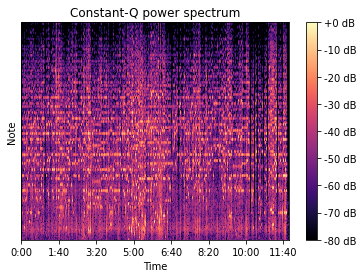

In [166]:
#Plot the spectrum 
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")